In [154]:
# import useful libraries for bayesian linear regression, classification and clustering 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [155]:
# read the data from the csv file

data = pd.read_csv('engine_data.csv')
data.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0

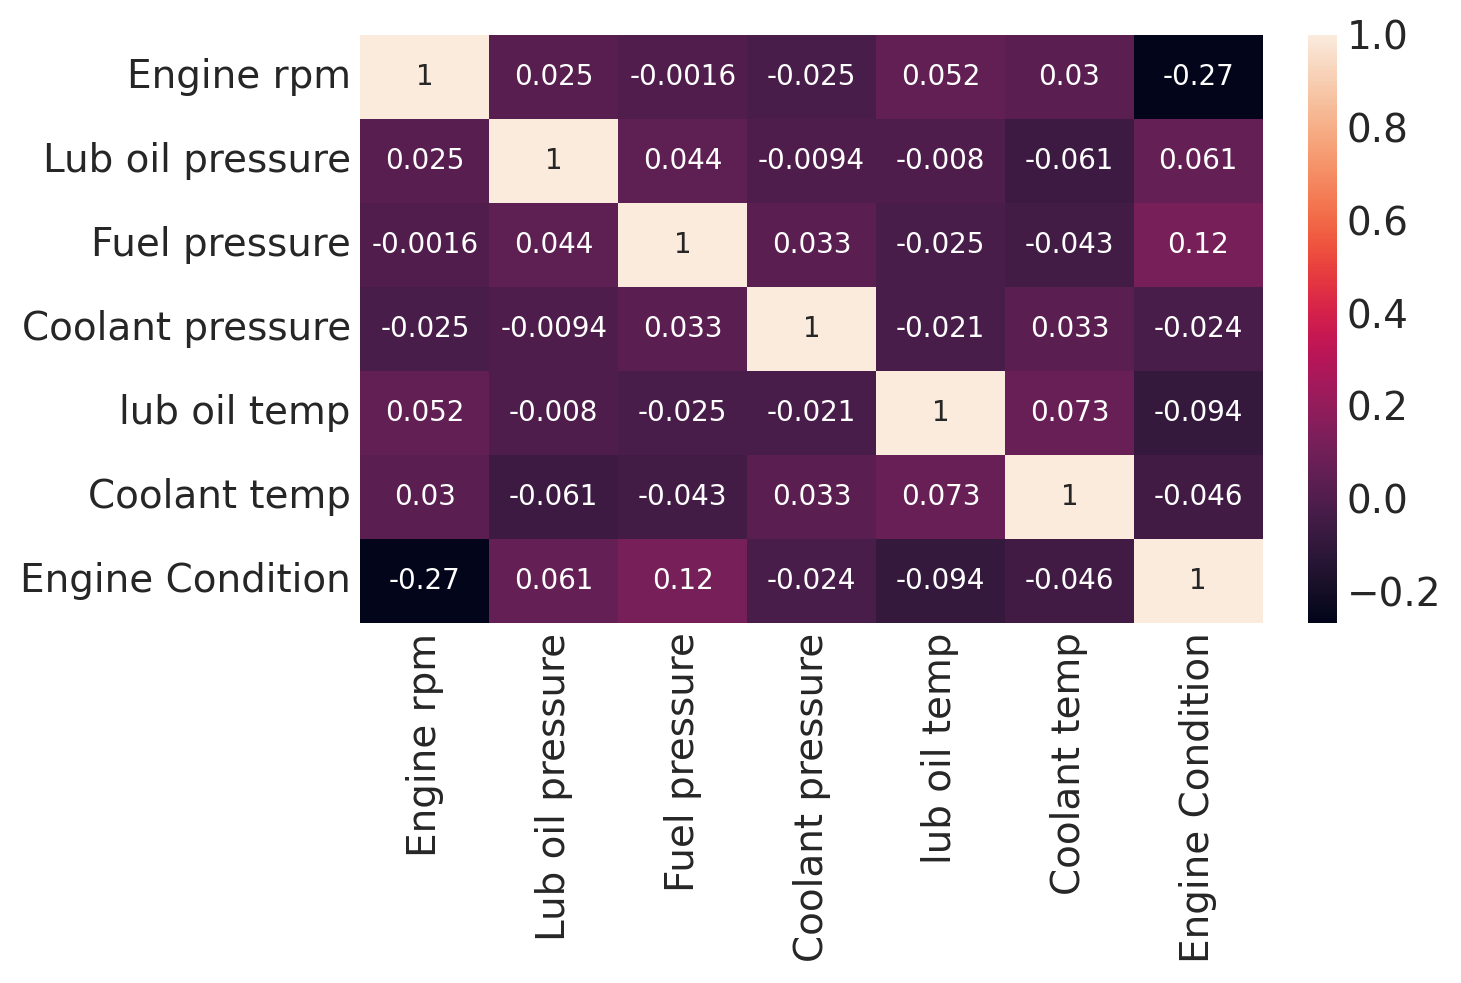

In [156]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [157]:
data.describe()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0.000000  
50%       76.817350     78.346662          1.000000  
75%       78.071691     82.915411          1.000000  
max       89.580796    195.527912          1.000000

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [159]:
# split the data into features and target

features = data.drop("Engine Condition", axis=1)
labels = data["Engine Condition"]

In [160]:
# sns.pairplot(data, hue="Engine Condition")

Note: Engine condition: 0: bad condition 1: good condition

# Machine learning Models

## Frequentist Models

## Bayesian Models

In [161]:
import pymc as pm
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import arviz as az
from sklearn.metrics import confusion_matrix

In [162]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

# standardize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the model

model = BayesianRidge()
model.fit(X_train, y_train)

# make predictions

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# evaluate the model

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", model.score(X_test, y_test))
print("classification report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Mean Squared Error:  0.34316134316134317
Accuracy:  0.09764300708703333
classification report:                precision    recall  f1-score   support

           0       0.59      0.27      0.37      3648
           1       0.67      0.89      0.76      6120

    accuracy                           0.66      9768
   macro avg       0.63      0.58      0.57      9768
weighted avg       0.64      0.66      0.62      9768

Confusion Matrix:  [[ 970 2678]
 [ 674 5446]]
Accuracy Score:  0.6568386568386568


### Using PyMC Library

In [252]:
# using pymc for bayesian linear regression 

# define the model

def bayesian_linear_regression(X, y):
    with pm.Model() as model:
        alpha = pm.Normal('alpha', mu=0, sigma=10)
        beta = pm.Normal('beta', mu=0, sigma=10, shape=X.shape[1])
        sigma = pm.HalfNormal('sigma', sigma=1)
        mu = alpha + pm.math.dot(X, beta)
        y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    return model

In [253]:
# train the model

model = bayesian_linear_regression(X_train, y_train)

# sample from the posterior

with model:
    trace = pm.sample(2000, tune=1000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


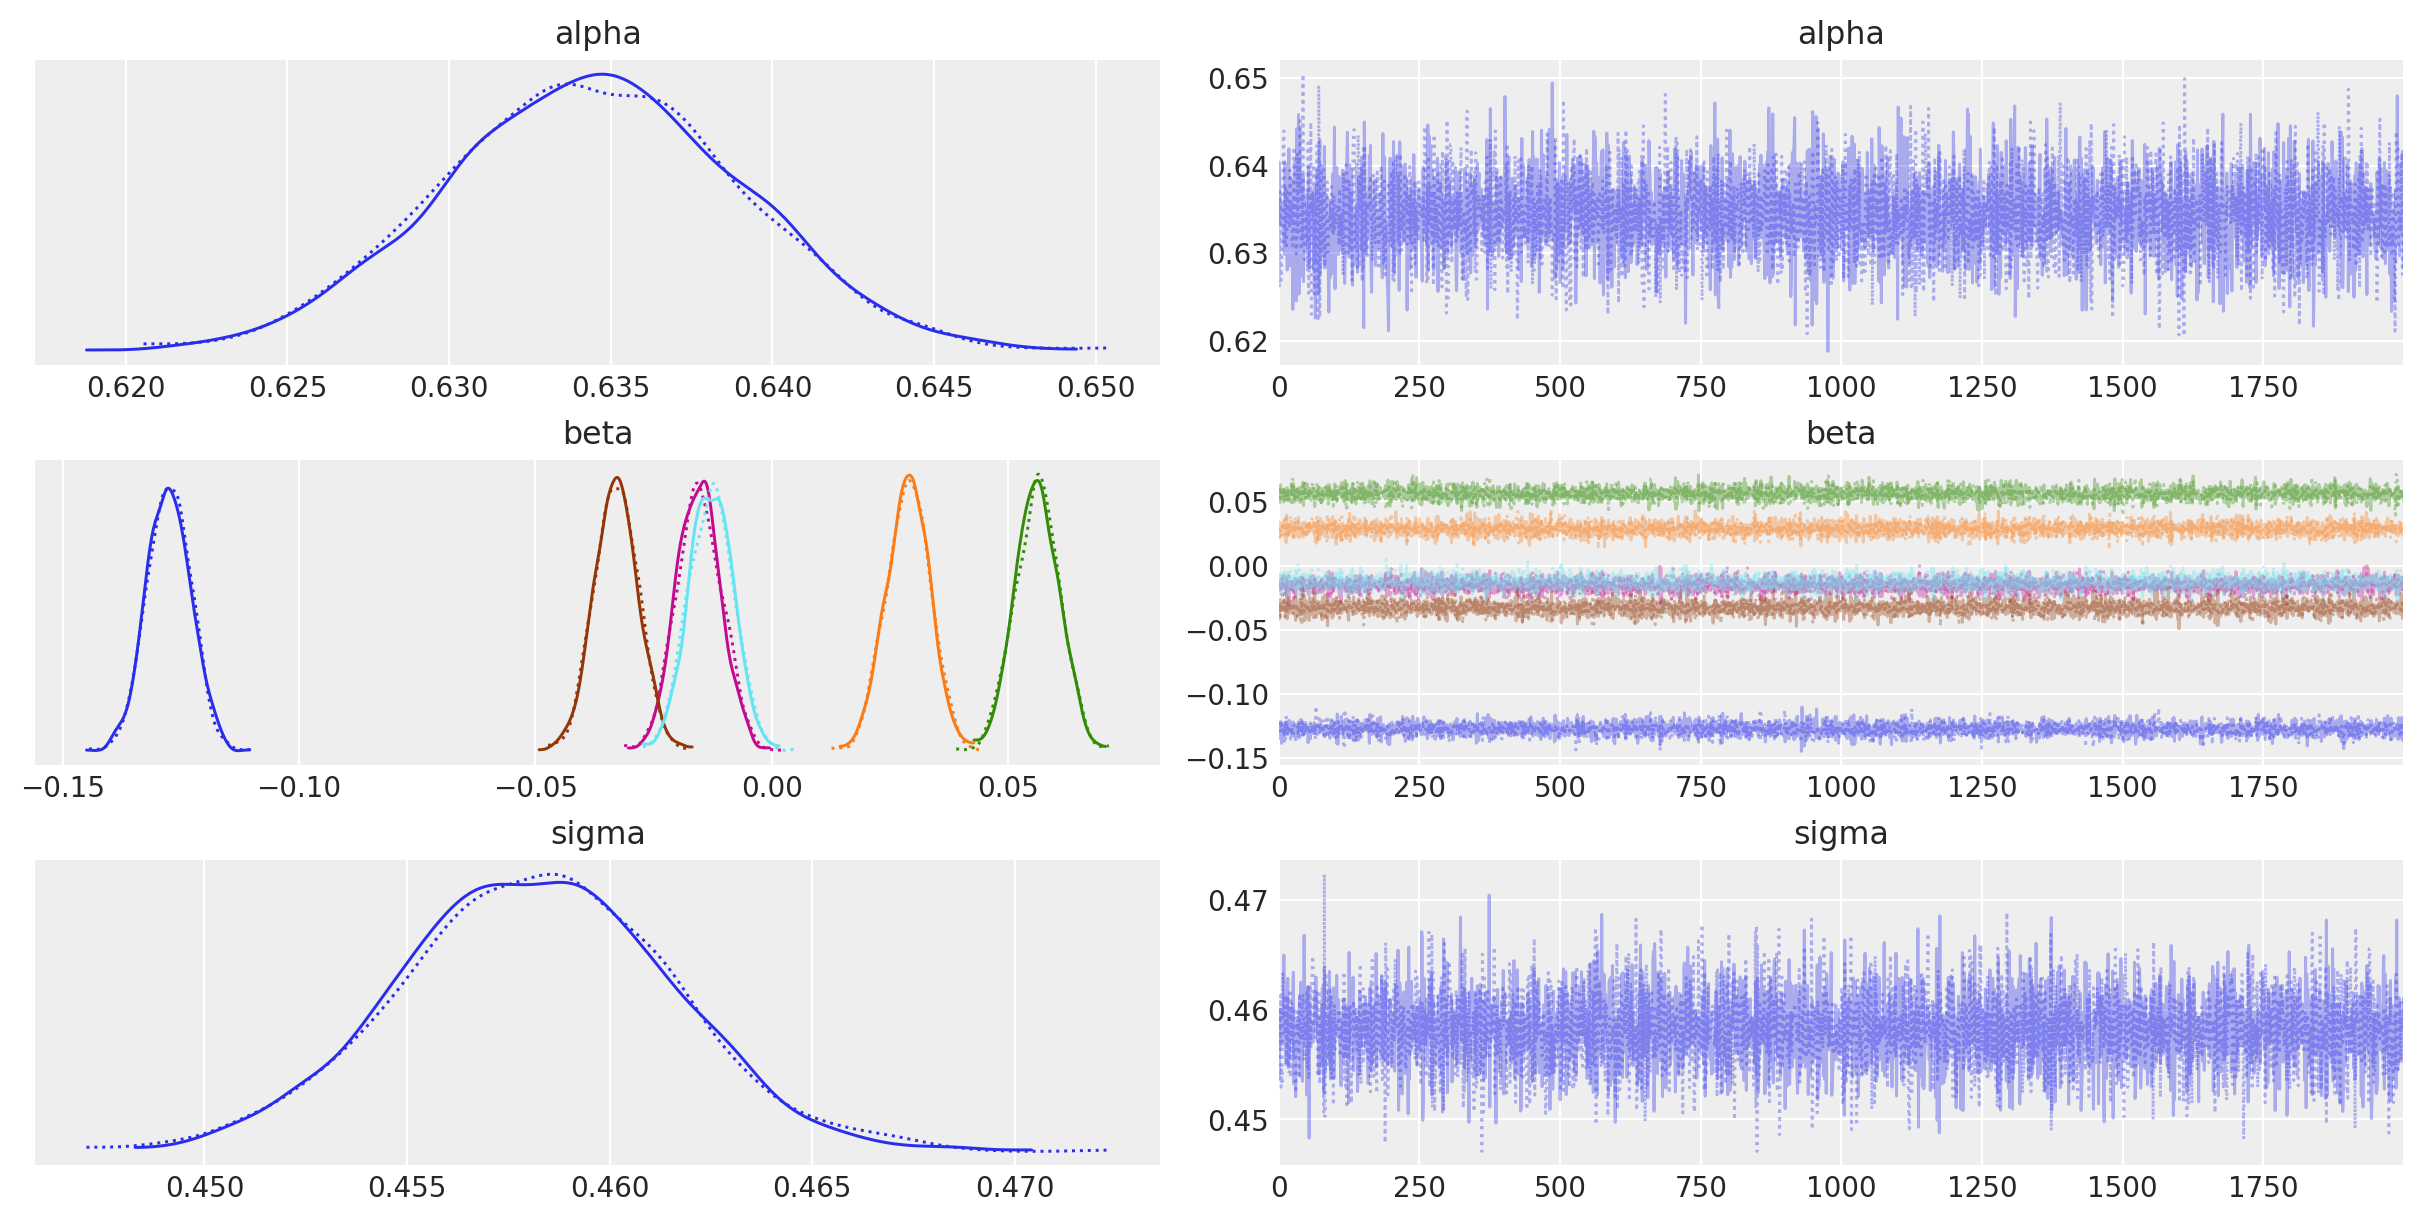

In [188]:
# plot the posterior

az.plot_trace(trace)
plt.show()

In [ ]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

## GLM linear regression

In [217]:
import bambi as bmb
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.12.0


In [218]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")


In [237]:
data

Engine_rpm  Lub_oil_pressure  Fuel_pressure  Coolant_pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub_oil_temp  Coolant_temp  Engine_Condition  
0         84.144163     81.632187                 1  
1         77.640934     82.445724                 0  
2         77.752266     79.645777                 1  
3         74.129907     71.774629                 1  
4         78.396989     87.000225                 0  
...             ...           ...               ...  
19530     75.951627     87.925087                 1  
19531     75.281430     74.928459                 1  
19532     76.844940     86.337345                 1  
19533     77.179693     73.624396                 1  
19534     75.564313     80.421421                 1  

[19535 rows x 7 columns]

In [238]:
data.rename(columns={'Engine rpm': 'Engine_rpm',
                     'Lub oil pressure': 'Lub_oil_pressure',
                     'Fuel pressure': 'Fuel_pressure',
                     'Coolant pressure': 'Coolant_pressure',
                     'lub oil temp': 'lub_oil_temp',
                     'Coolant temp': 'Coolant_temp',
                     'Engine Condition': 'Engine_Condition',
                    }, inplace=True)

In [239]:
model = bmb.Model("Coolant_temp ~ Fuel_pressure + Coolant_pressure + lub_oil_temp + Lub_oil_pressure + Engine_Condition + Engine_rpm", data)
fitted = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Coolant_temp_sigma, Intercept, Fuel_pressure, Coolant_pressure, lub_oil_temp, Lub_oil_pressure, Engine_Condition, Engine_rpm]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


In [240]:
fitted

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [241]:
# Get model description
print(model)

       Formula: Coolant_temp ~ Fuel_pressure + Coolant_pressure + lub_oil_temp + Lub_oil_pressure + Engine_Condition + Engine_rpm
        Family: gaussian
          Link: mu = identity
  Observations: 19535
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 78.4274, sigma: 397.3312)
            Fuel_pressure ~ Normal(mu: 0.0, sigma: 5.62)
            Coolant_pressure ~ Normal(mu: 0.0, sigma: 14.9722)
            lub_oil_temp ~ Normal(mu: 0.0, sigma: 4.9878)
            Lub_oil_pressure ~ Normal(mu: 0.0, sigma: 15.1882)
            Engine_Condition ~ Normal(mu: 0.0, sigma: 32.1474)
            Engine_rpm ~ Normal(mu: 0.0, sigma: 0.058)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 6.2066)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


Sampling: [Coolant_pressure, Coolant_temp_sigma, Engine_Condition, Engine_rpm, Fuel_pressure, Intercept, Lub_oil_pressure, lub_oil_temp]


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Coolant_temp_sigma'}>,
        <Axes: title={'center': 'Fuel_pressure'}>,
        <Axes: title={'center': 'Coolant_pressure'}>],
       [<Axes: title={'center': 'lub_oil_temp'}>,
        <Axes: title={'center': 'Lub_oil_pressure'}>,
        <Axes: title={'center': 'Engine_Condition'}>,
        <Axes: title={'center': 'Engine_rpm'}>]], dtype=object)

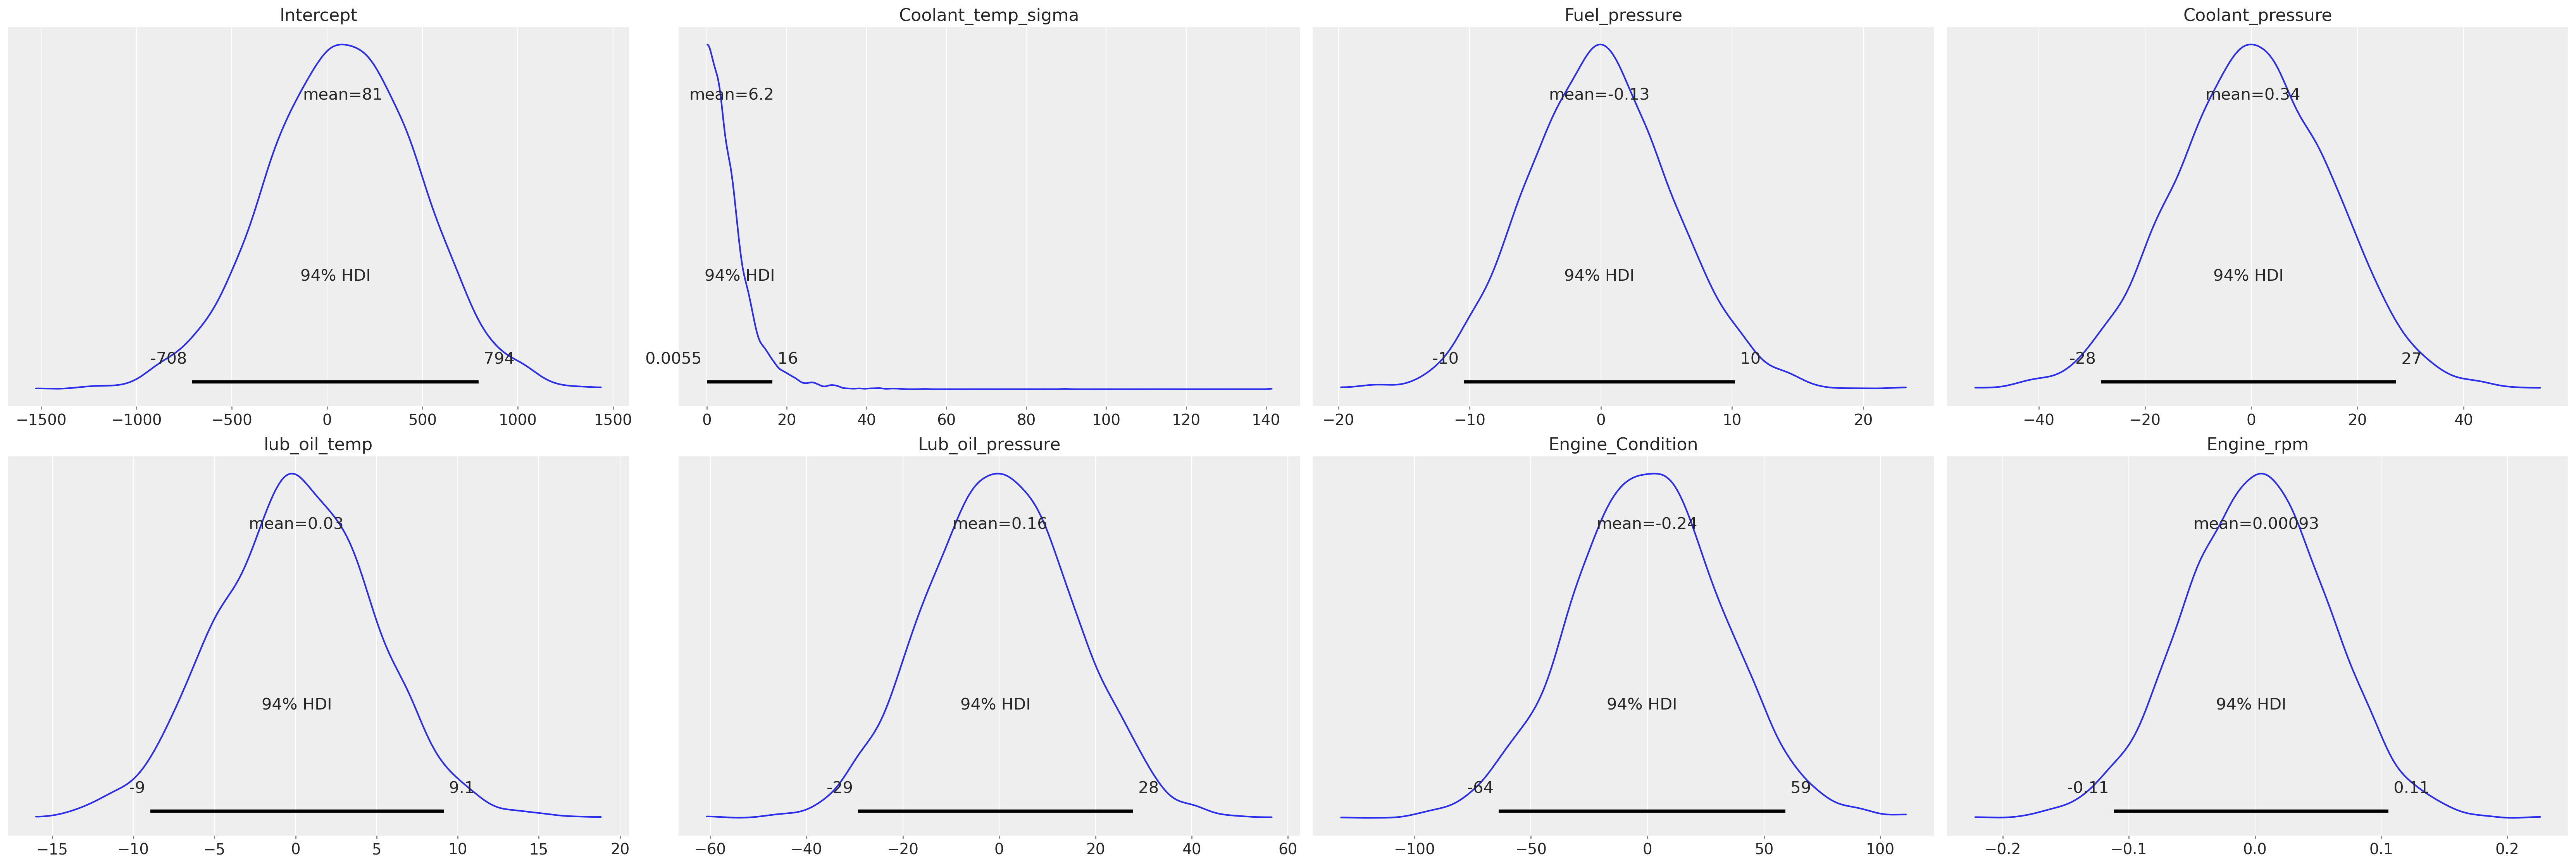

In [244]:
model.plot_priors()

In [242]:
results = model.fit(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Coolant_temp_sigma, Intercept, Fuel_pressure, Coolant_pressure, lub_oil_temp, Lub_oil_pressure, Engine_Condition, Engine_rpm]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'Fuel_pressure'}>,
        <Axes: title={'center': 'Fuel_pressure'}>],
       [<Axes: title={'center': 'Coolant_pressure'}>,
        <Axes: title={'center': 'Coolant_pressure'}>],
       [<Axes: title={'center': 'lub_oil_temp'}>,
        <Axes: title={'center': 'lub_oil_temp'}>],
       [<Axes: title={'center': 'Lub_oil_pressure'}>,
        <Axes: title={'center': 'Lub_oil_pressure'}>],
       [<Axes: title={'center': 'Engine_Condition'}>,
        <Axes: title={'center': 'Engine_Condition'}>],
       [<Axes: title={'center': 'Engine_rpm'}>,
        <Axes: title={'center': 'Engine_rpm'}>],
       [<Axes: title={'center': 'Coolant_temp_sigma'}>,
        <Axes: title={'center': 'Coolant_temp_sigma'}>]], dtype=object)

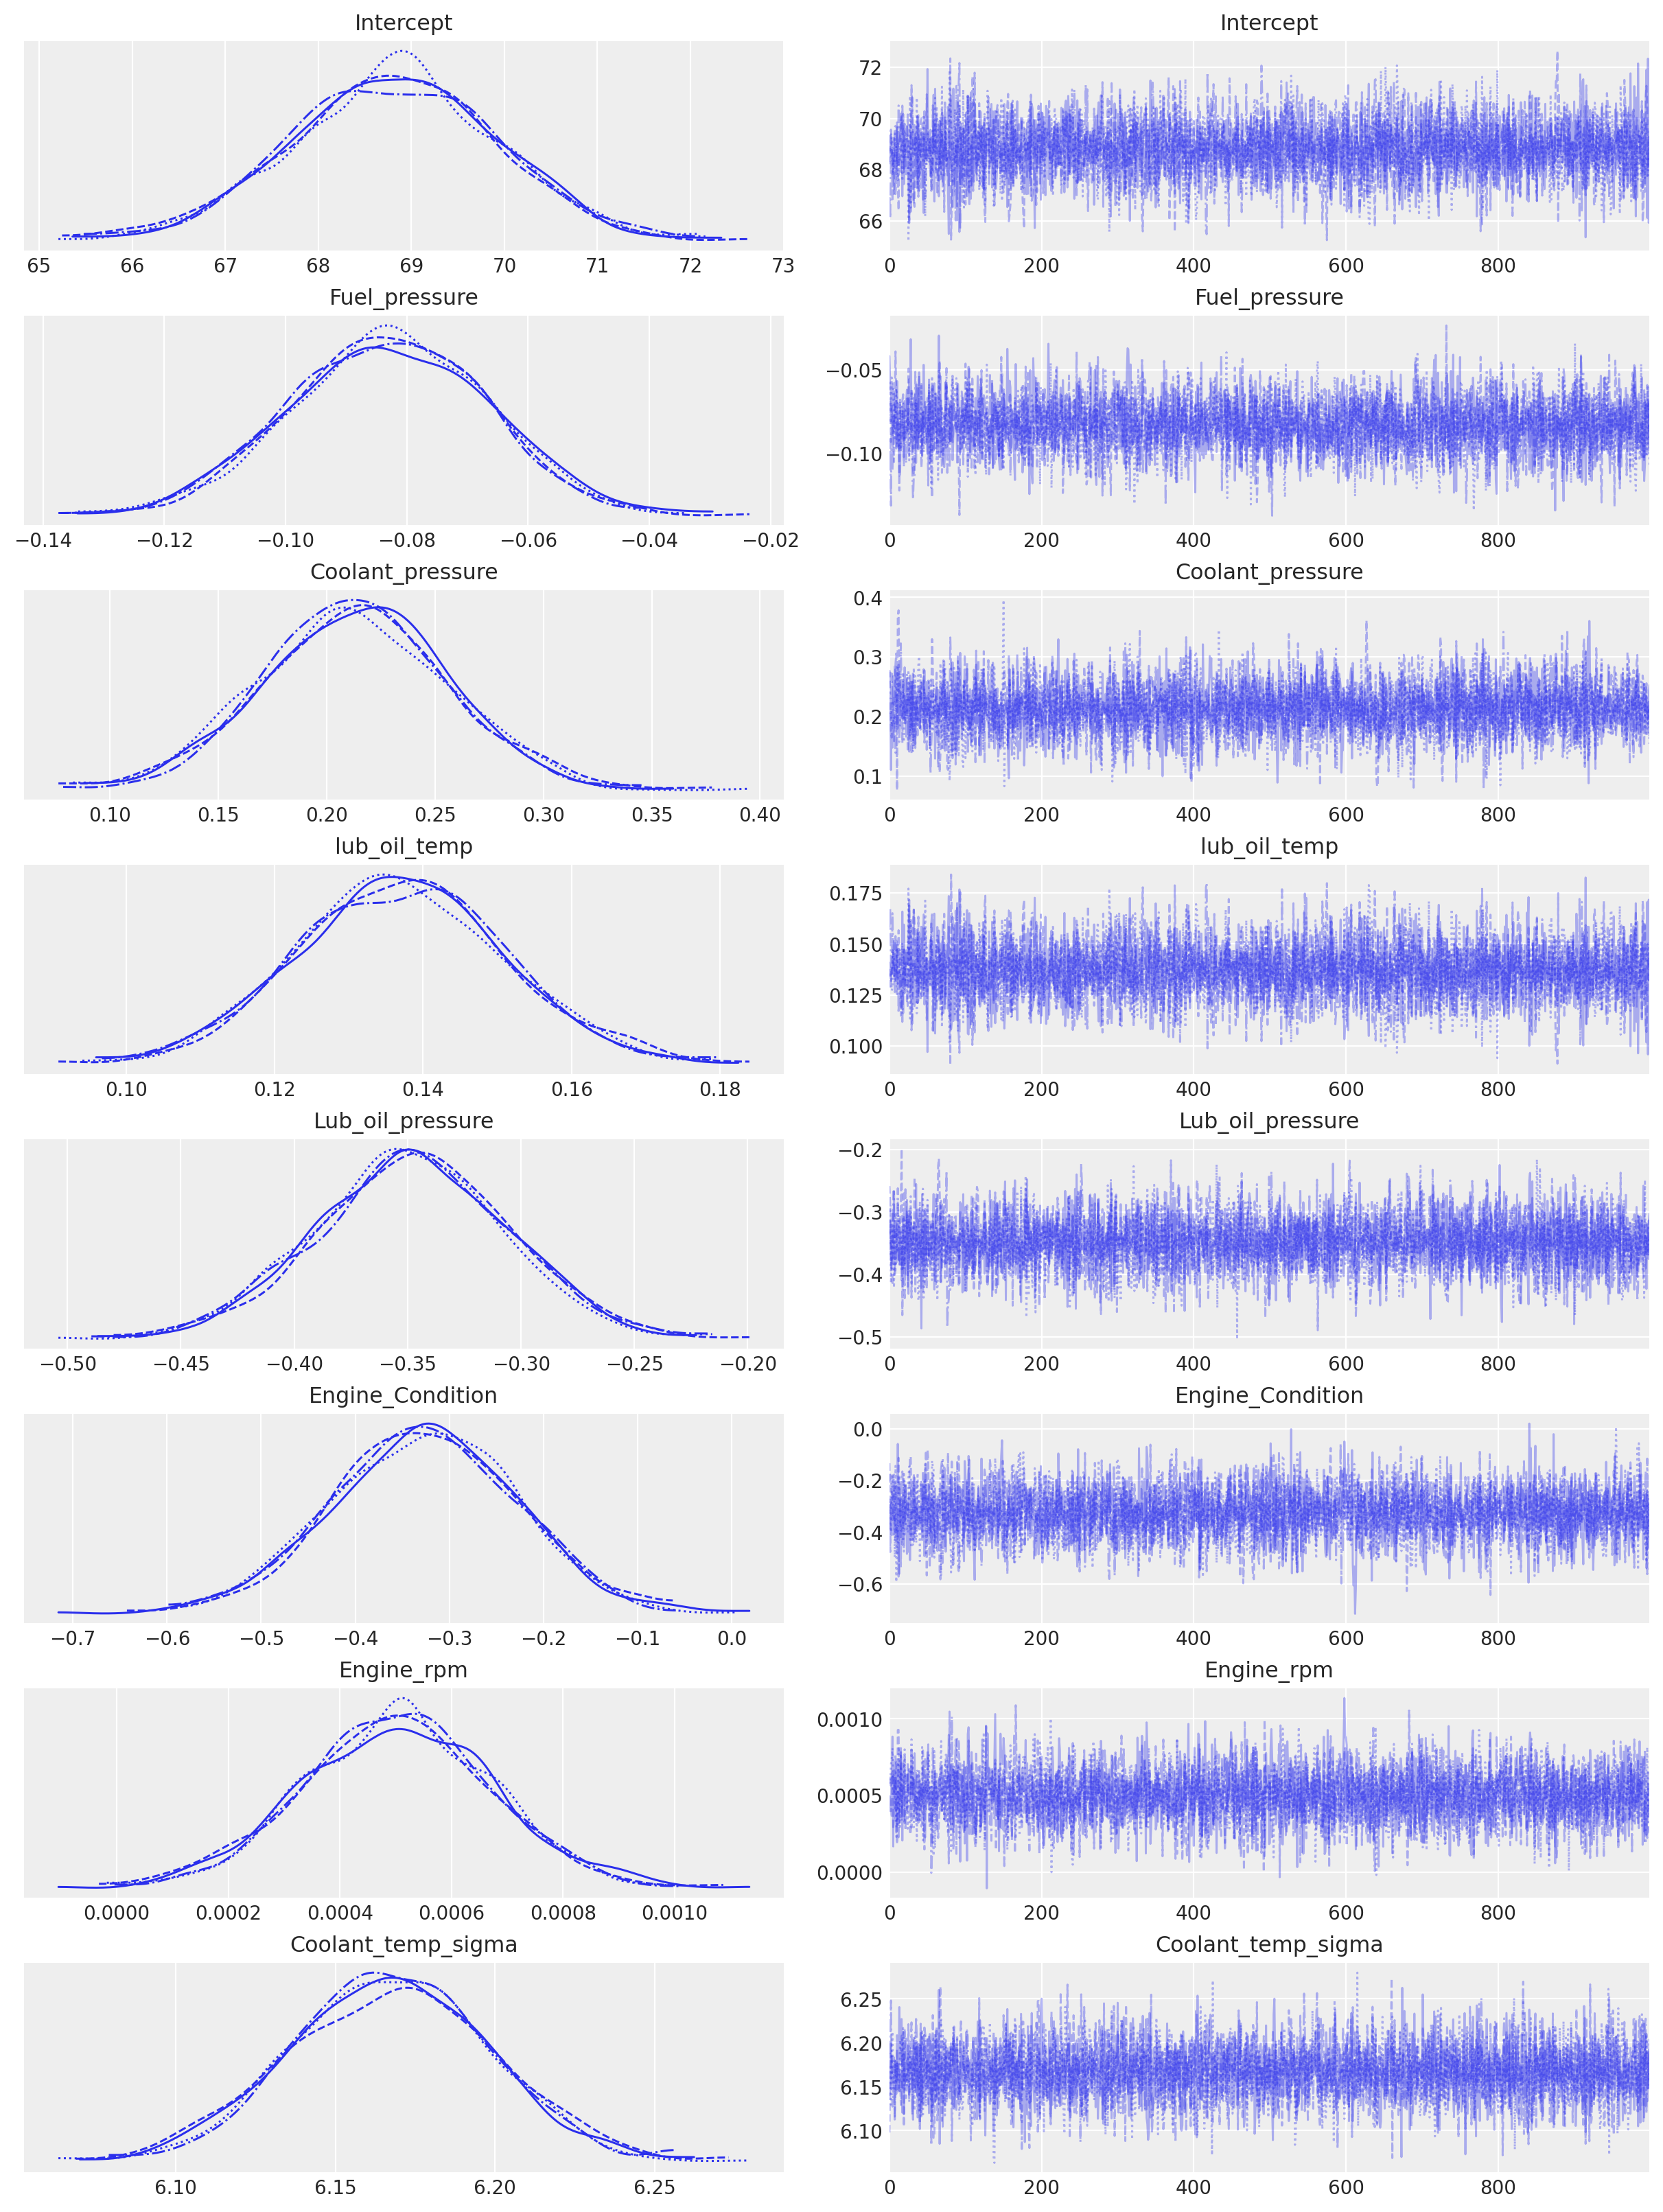

In [243]:
# Key summary and diagnostic info on the model parameters
az.summary(results)

# Use ArviZ to plot the results
az.plot_trace(results)

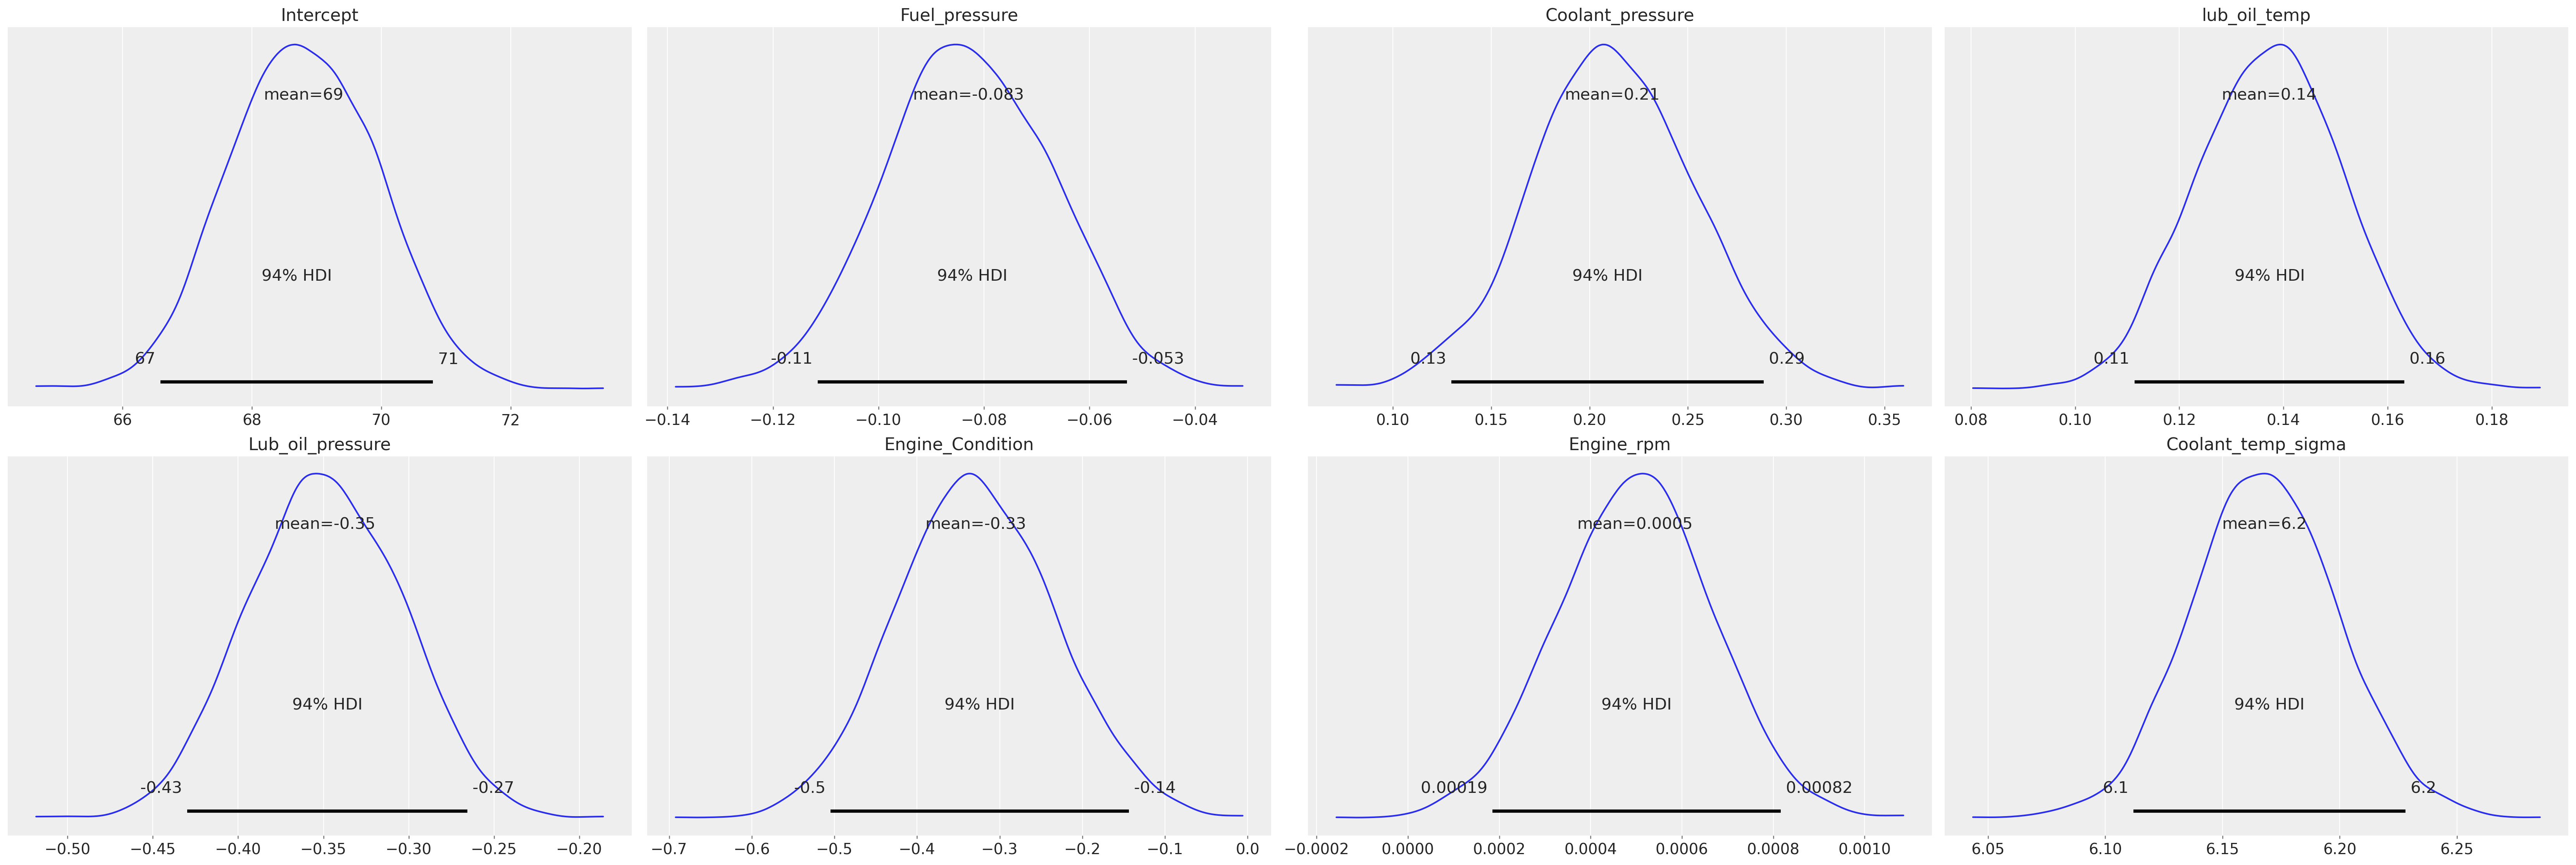

In [247]:
az.plot_posterior(fitted);

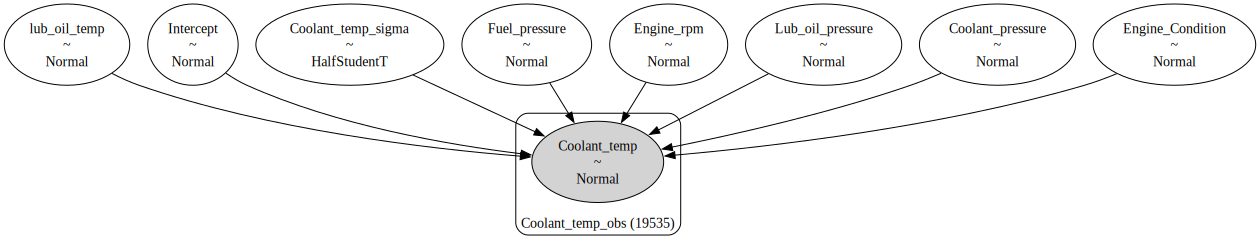

In [248]:
model.graph()

In [249]:
az.summary(fitted)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept           68.798  1.143  66.587   70.799      0.016    0.011   
Fuel_pressure       -0.083  0.016  -0.112   -0.053      0.000    0.000   
Coolant_pressure     0.212  0.042   0.130    0.288      0.001    0.000   
lub_oil_temp         0.137  0.014   0.111    0.163      0.000    0.000   
Lub_oil_pressure    -0.349  0.045  -0.430   -0.266      0.001    0.000   
Engine_Condition    -0.329  0.096  -0.505   -0.144      0.001    0.001   
Engine_rpm           0.000  0.000   0.000    0.001      0.000    0.000   
Coolant_temp_sigma   6.168  0.031   6.112    6.228      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
Intercept             5268.0    3249.0    1.0  
Fuel_pressure         3896.0    2936.0    1.0  
Coolant_pressure      5359.0    3410.0    1.0  
lub_oil_temp          5278.0    3377.0    1.0  
Lub_oil_pressure      5223.0    2835.0    1.0  
Engine_Condition      4870.0    3513.0    1.0  
Engine_rpm            4524.0    3218.0    1.0  
Coolant_temp_sigma    5724.0    3277.0    1.0

In [250]:
posterior_predictive = model.predict(fitted, kind="pps")
fitted


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

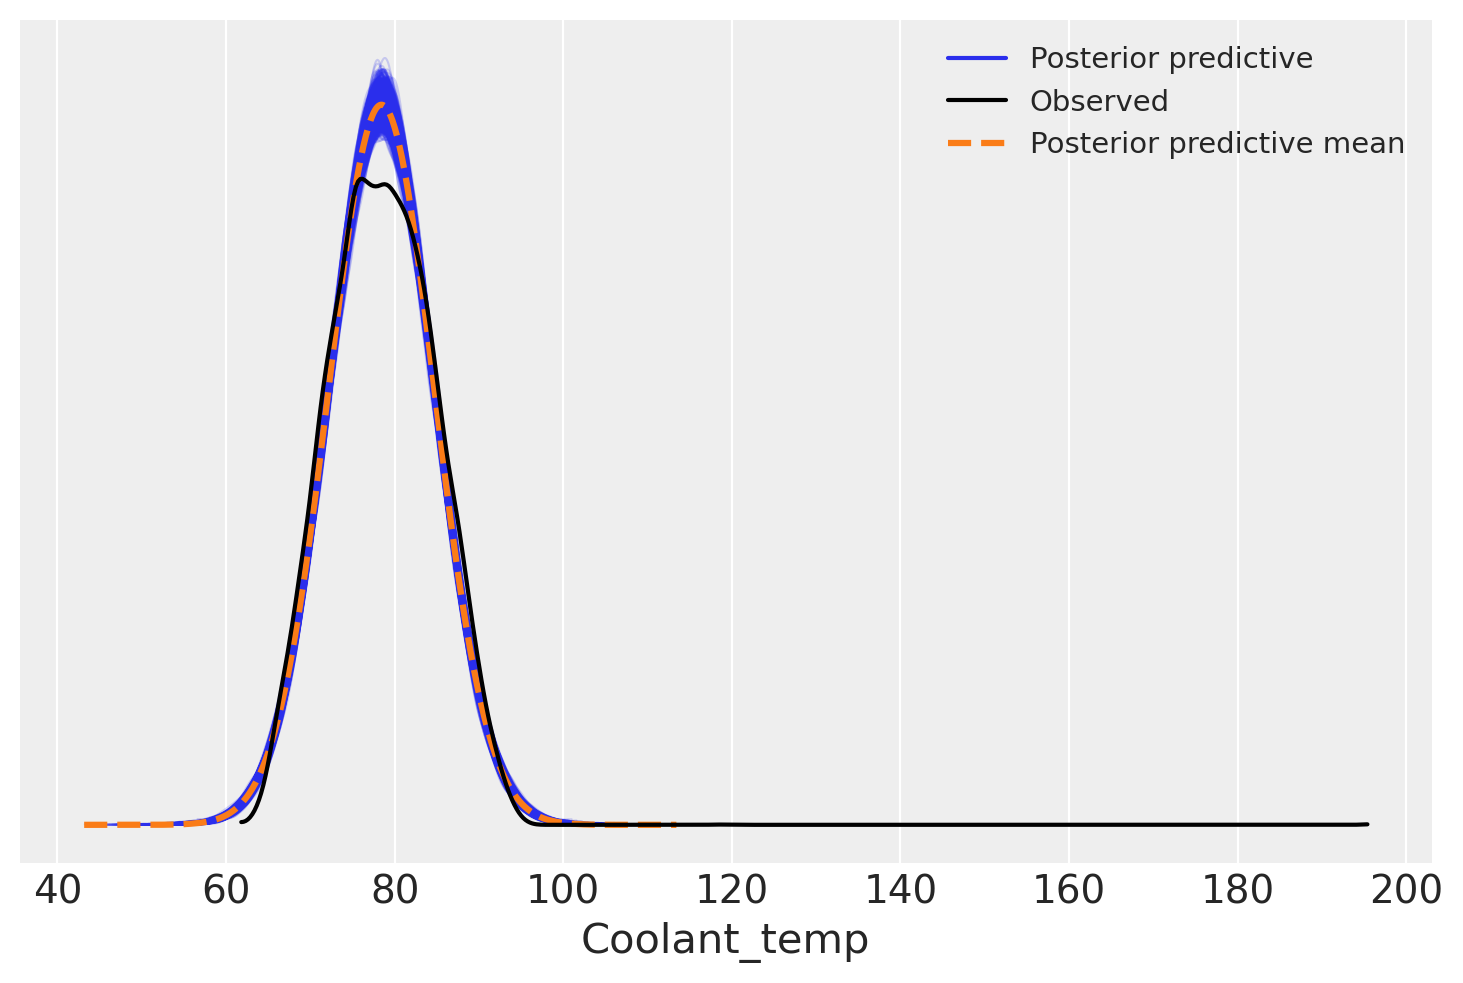

In [251]:
az.plot_ppc(fitted);

## Classification

In [230]:
model = bmb.Model("Engine_Condition ~ Fuel_pressure + Coolant_pressure + lub_oil_temp + Coolant_temp + Lub_oil_pressure + Engine_rpm", data, family="bernoulli")
fitted = model.fit()

Modeling the probability that Engine_Condition==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, Fuel_pressure, Coolant_pressure, lub_oil_temp, Coolant_temp, Lub_oil_pressure, Engine_rpm]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5064 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [231]:
print(model) # Get model description

       Formula: Engine_Condition ~ Fuel_pressure + Coolant_pressure + lub_oil_temp + Coolant_temp + Lub_oil_pressure + Engine_rpm
        Family: bernoulli
          Link: p = logit
  Observations: 19535
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 71.313)
            Fuel_pressure ~ Normal(mu: 0.0, sigma: 0.9055)
            Coolant_pressure ~ Normal(mu: 0.0, sigma: 2.4123)
            lub_oil_temp ~ Normal(mu: 0.0, sigma: 0.8036)
            Coolant_temp ~ Normal(mu: 0.0, sigma: 0.4028)
            Lub_oil_pressure ~ Normal(mu: 0.0, sigma: 2.4471)
            Engine_rpm ~ Normal(mu: 0.0, sigma: 0.0093)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


In [232]:
results = model.fit(draws=1000) # Fit the model using 1000 on each chain

Modeling the probability that Engine_Condition==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, Fuel_pressure, Coolant_pressure, lub_oil_temp, Coolant_temp, Lub_oil_pressure, Engine_rpm]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1202 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling: [Coolant_pressure, Coolant_temp, Engine_rpm, Fuel_pressure, Intercept, Lub_oil_pressure, lub_oil_temp]


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Fuel_pressure'}>,
        <Axes: title={'center': 'Coolant_pressure'}>],
       [<Axes: title={'center': 'lub_oil_temp'}>,
        <Axes: title={'center': 'Coolant_temp'}>,
        <Axes: title={'center': 'Lub_oil_pressure'}>],
       [<Axes: title={'center': 'Engine_rpm'}>, <Axes: >, <Axes: >]],
      dtype=object)

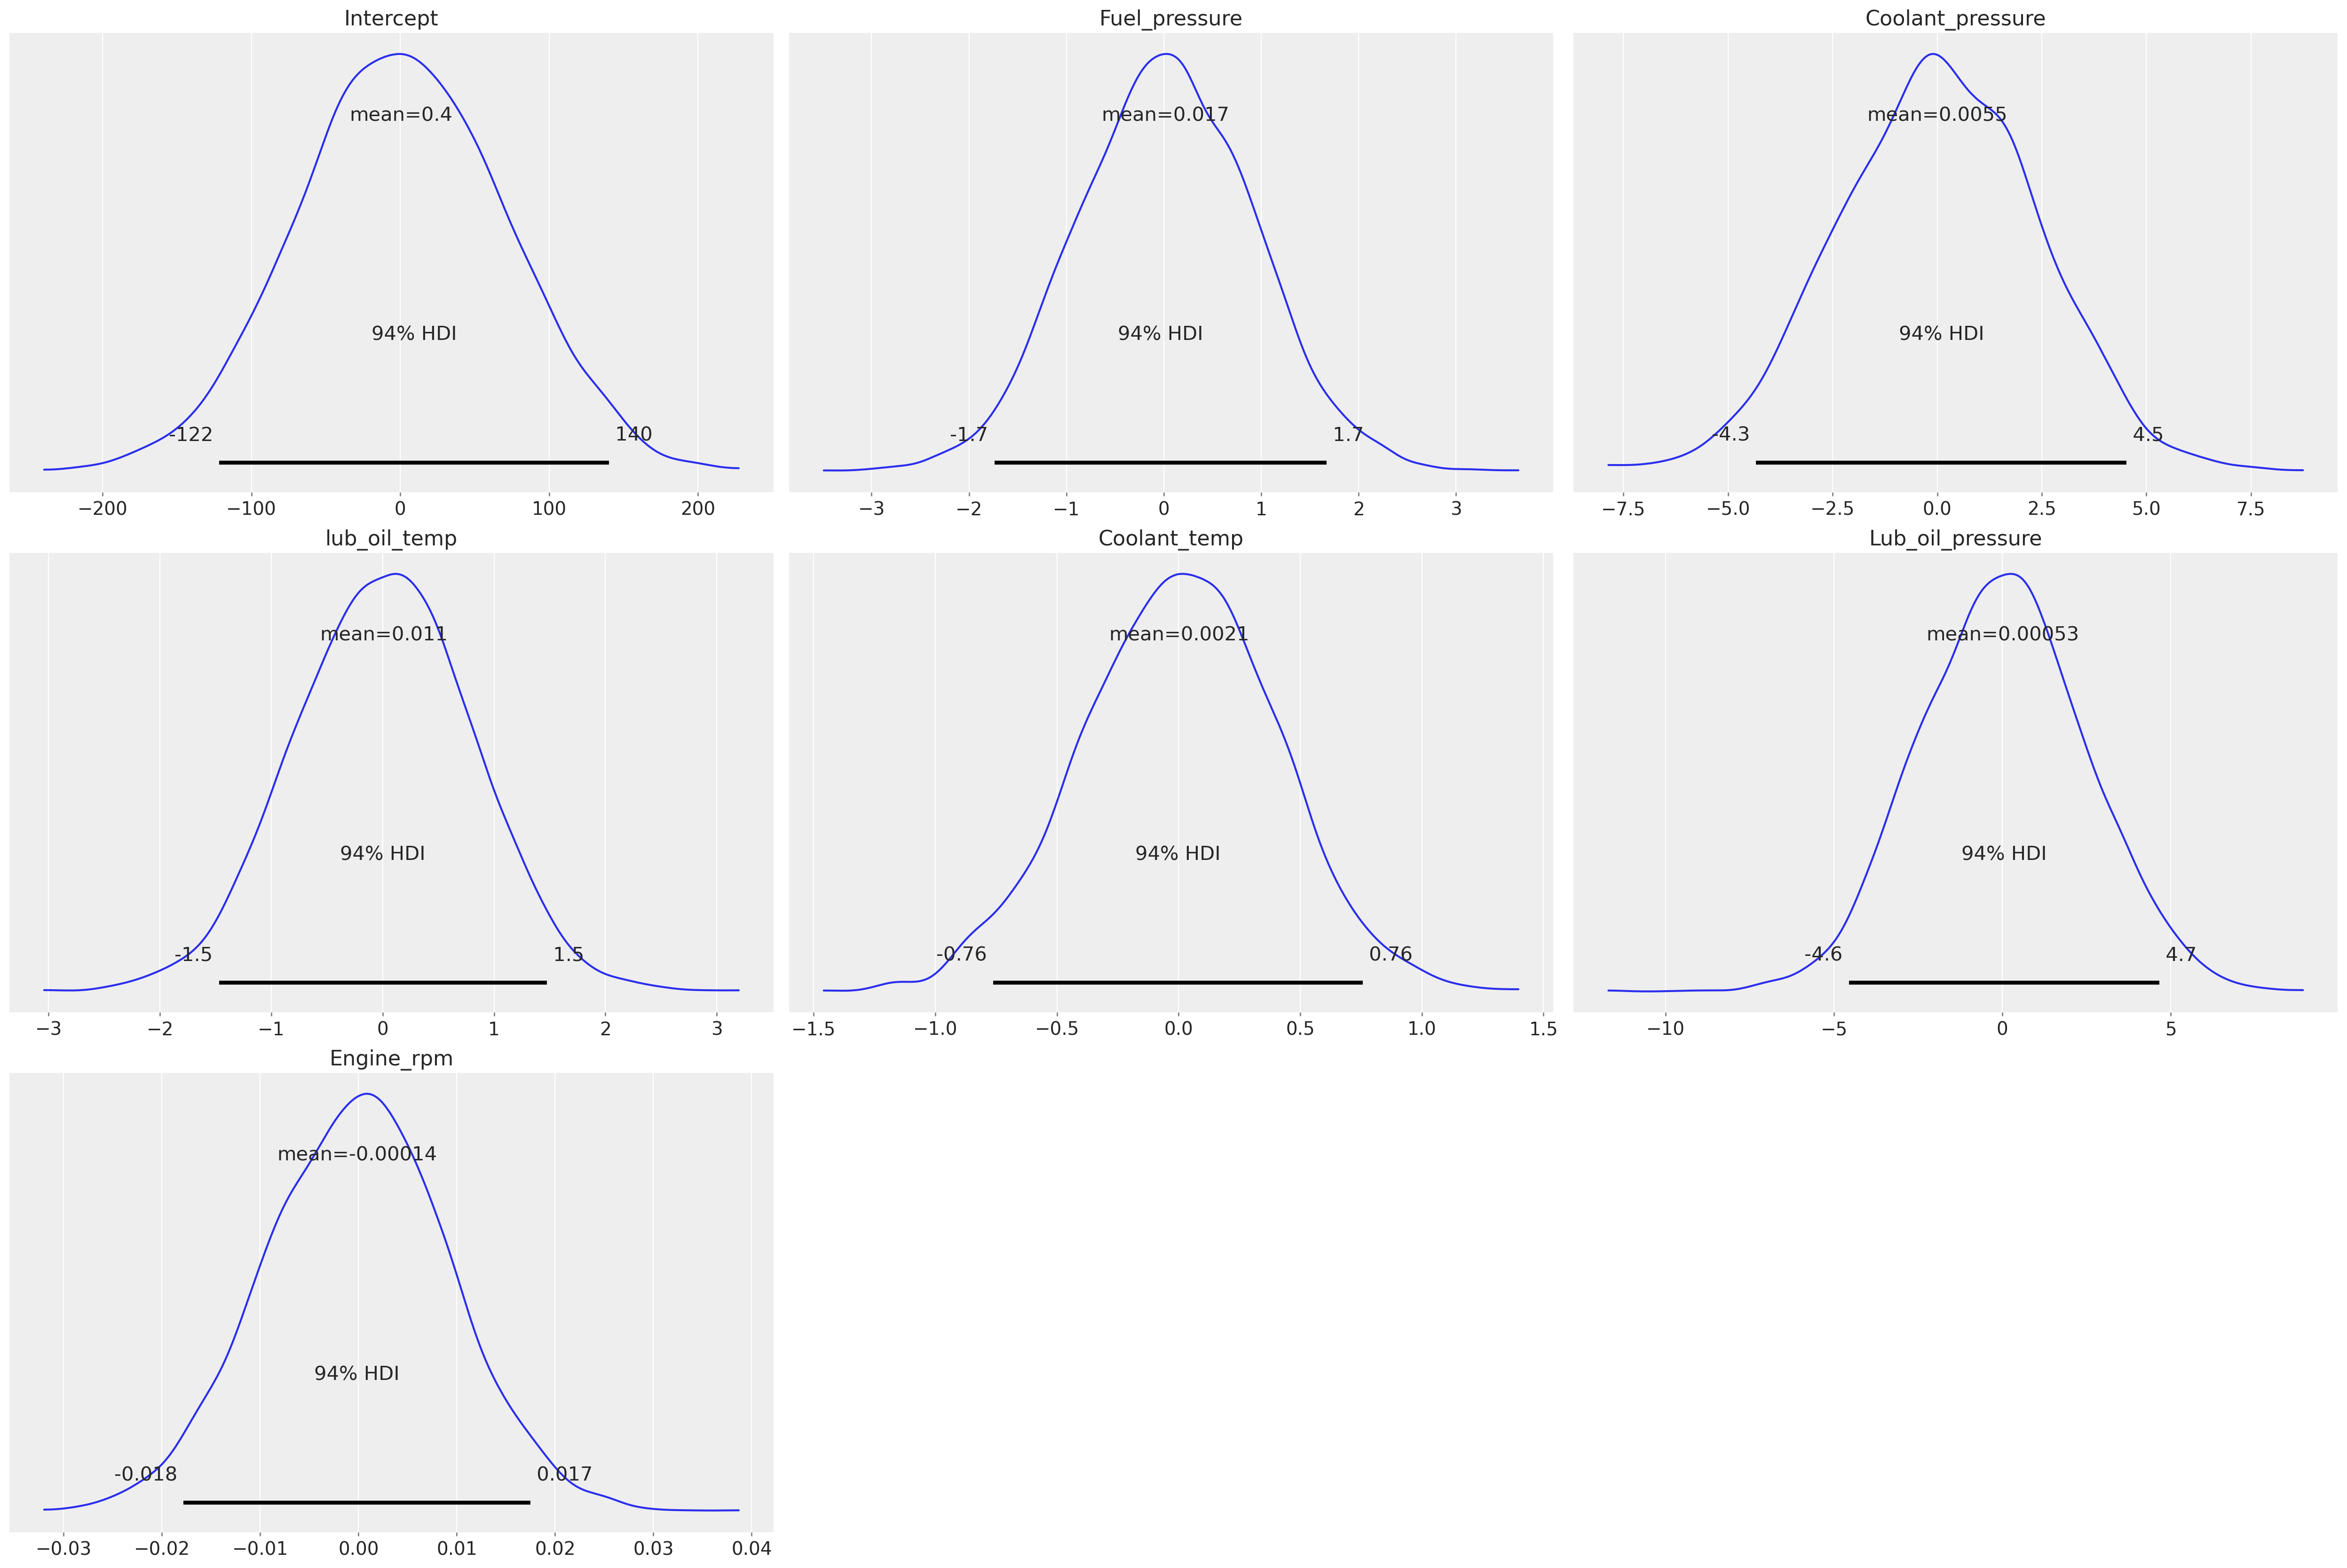

In [233]:
model.plot_priors()

In [234]:
# Key summary and diagnostic info on the model parameters
az.summary(results)

mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept         93.080  91.535  -7.601  212.905     45.508   34.834   
Fuel_pressure      0.061   0.594  -0.885    0.741      0.296    0.226   
Coolant_pressure  -0.237   0.314  -0.768    0.036      0.156    0.120   
lub_oil_temp      -0.020   0.608  -0.977    0.665      0.303    0.232   
Coolant_temp       0.024   0.481  -0.394    0.819      0.240    0.184   
Lub_oil_pressure   0.102   0.495  -0.690    0.660      0.247    0.189   
Engine_rpm        -0.118   0.186  -0.338    0.134      0.092    0.071   

                  ess_bulk  ess_tail  r_hat  
Intercept              4.0      11.0   3.60  
Fuel_pressure          5.0      31.0   3.41  
Coolant_pressure       4.0      11.0   3.63  
lub_oil_temp           4.0      15.0   3.94  
Coolant_temp           4.0      11.0   3.98  
Lub_oil_pressure       4.0      13.0   3.25  
Engine_rpm             4.0      11.0   4.06

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'Fuel_pressure'}>,
        <Axes: title={'center': 'Fuel_pressure'}>],
       [<Axes: title={'center': 'Coolant_pressure'}>,
        <Axes: title={'center': 'Coolant_pressure'}>],
       [<Axes: title={'center': 'lub_oil_temp'}>,
        <Axes: title={'center': 'lub_oil_temp'}>],
       [<Axes: title={'center': 'Coolant_temp'}>,
        <Axes: title={'center': 'Coolant_temp'}>],
       [<Axes: title={'center': 'Lub_oil_pressure'}>,
        <Axes: title={'center': 'Lub_oil_pressure'}>],
       [<Axes: title={'center': 'Engine_rpm'}>,
        <Axes: title={'center': 'Engine_rpm'}>]], dtype=object)

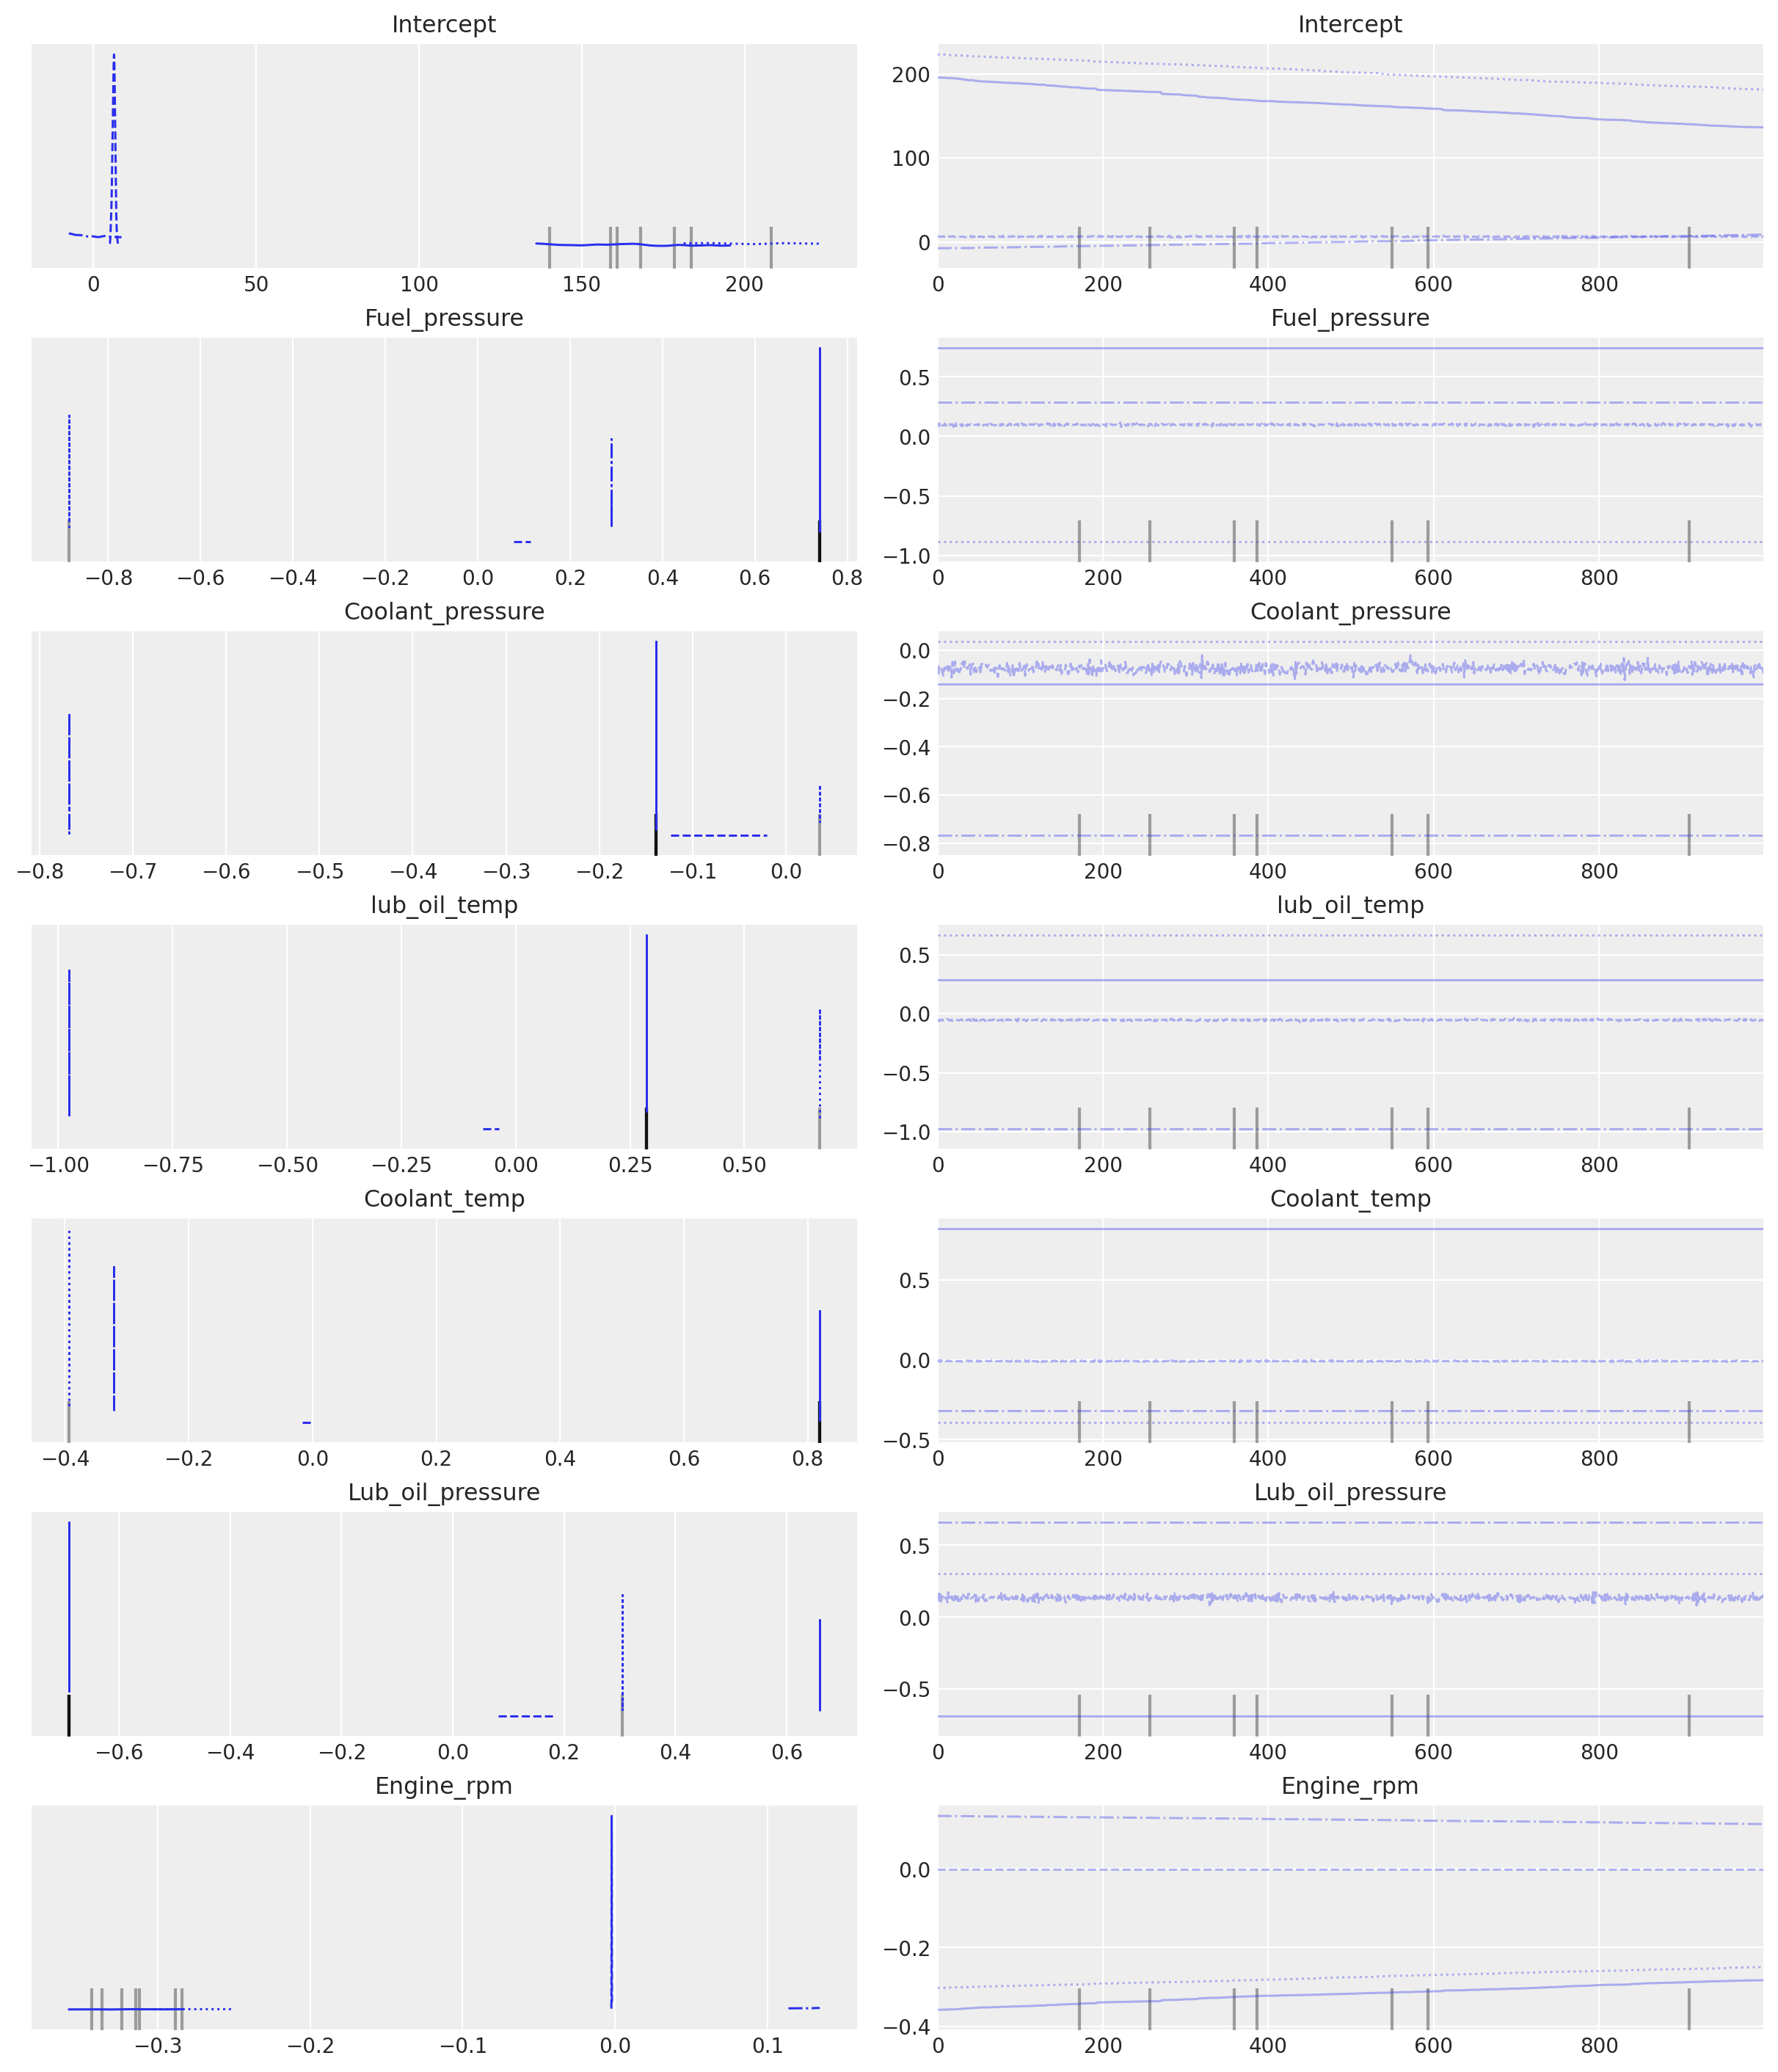

In [235]:
# Use ArviZ to plot the results
az.plot_trace(results)

## Clustering